#### Machine learning optimisation

In [ ]:
#Multivariate linear regression using train test split

In [1]:
#Applying train test split and linear regression
import pandas as pd
df = pd.read_csv("datasets/insurance_charges.csv")
df

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1
...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830,0
1334,18,0,31.920,0,0,0,2205.98080,1
1335,18,0,36.850,0,0,2,1629.83350,1
1336,21,0,25.800,0,0,3,2007.94500,0


In [4]:
X = df.drop(['charges', 'insuranceclaim'], axis=1)
y = df['charges']
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#print("X_train shape: {}, X_test shape: {}, y_train shape: {}, y_test shape {}".format(X_train.shape, X_test.shape, y_train.shape, y_test.shape))

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [16]:
X_train

,age,sex,bmi,children,smoker,region
621,37,1,34.100,4,1,3
194,18,1,34.430,0,0,2
240,23,0,36.670,2,1,0
1168,32,1,35.200,2,0,3
1192,58,0,32.395,1,0,0
...,...,...,...,...,...,...
763,27,1,26.030,0,0,0
835,42,1,35.970,2,0,2
1216,40,1,25.080,0,0,2
559,19,1,35.530,0,0,1


In [7]:
X_test

,age,sex,bmi,children,smoker,region
764,45,0,25.175,2,0,0
887,36,0,30.020,0,0,1
890,64,0,26.885,0,1,1
1293,46,1,25.745,3,0,1
259,19,1,31.920,0,1,1
...,...,...,...,...,...,...
109,63,1,35.090,0,1,2
575,58,0,27.170,0,0,1
535,38,1,28.025,1,0,0
543,54,0,47.410,0,1,2


In [ ]:
# Try printing out the shapes of these splits

In [18]:
from sklearn.metrics import mean_squared_error

In [ ]:
# Train your model here


In [19]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
mean_squared_error(y_train, y_pred_train)

37729580.50984919

In [20]:
y_pred = model.predict(X_test)
mean_squared_error(y_test, y_pred)

31845929.134159423

In [ ]:
# Compare the errors between the two. What do you notice? What's the significance of either being significantly different
# from the other?

In [41]:
'''
Carry out the same process for the Boston house dataset, X and y already provided.
Output the scores for train and test sets
'''
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
df = load_boston()
df = pd.DataFrame(np.c_[df['data'], df['target']],
                  columns= np.append(df['feature_names'], ['target']))
y = df['target']
X = df.drop('target', axis=1)

ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>


***

#### Standardising our dataset
Note: make sure to fit on the training set and then apply this to both. Don't include test in the fit (this helps to prevent data leakage from our test set)

In [ ]:
# Print the X_train, X_test here

In [25]:
# Standardizing our data first
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [36]:
mm_scaler = MinMaxScaler(feature_range=(0,1))
mm_scaler.fit(X_train)

X_train_scaled_mm = mm_scaler.transform(X_train)
X_test_scaled_mm = mm_scaler.transform(X_test)

In [37]:
X_train_scaled_mm 

array([[0.41304348, 1.        , 0.48802798, 0.8       , 1.        ,
        1.        ],
       [0.        , 1.        , 0.49690611, 0.        , 0.        ,
        0.66666667],
       [0.10869565, 0.        , 0.55716976, 0.4       , 1.        ,
        0.        ],
       ...,
       [0.47826087, 1.        , 0.24535916, 0.        , 0.        ,
        0.66666667],
       [0.02173913, 1.        , 0.52649987, 0.        , 0.        ,
        0.33333333],
       [0.32608696, 0.        , 0.06833468, 0.2       , 0.        ,
        1.        ]])

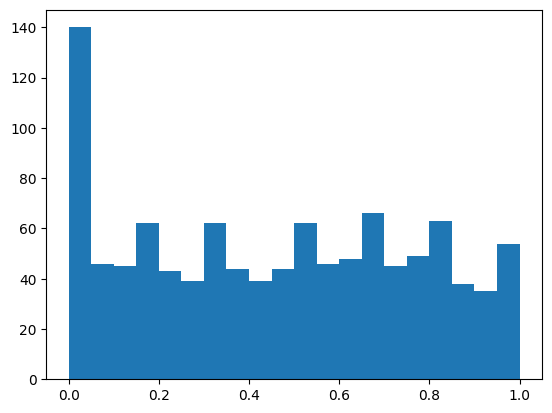

In [38]:
values = pd.DataFrame(X_train_scaled_mm)[0]

import matplotlib.pyplot as plt

plt.hist(values, bins=20)
plt.show()

In [ ]:
# Print the standardised X_train/X_test here

In [22]:
X_train

,age,sex,bmi,children,smoker,region
621,37,1,34.100,4,1,3
194,18,1,34.430,0,0,2
240,23,0,36.670,2,1,0
1168,32,1,35.200,2,0,3
1192,58,0,32.395,1,0,0
...,...,...,...,...,...,...
763,27,1,26.030,0,0,0
835,42,1,35.970,2,0,2
1216,40,1,25.080,0,0,2
559,19,1,35.530,0,0,1


In [24]:
pd.DataFrame(X_train_scaled)

,0,1,2,3,4,5
0,-0.148533,1.015067,0.545305,2.413948,1.971255,1.309065
1,-1.497808,1.015067,0.598672,-0.892195,-0.507291,0.404804
2,-1.142736,-0.985157,0.960921,0.760876,1.971255,-1.403716
3,-0.503605,1.015067,0.723195,0.760876,-0.507291,1.309065
4,1.342771,-0.985157,0.269575,-0.065659,-0.507291,-1.403716
...,...,...,...,...,...,...
1065,-0.858678,1.015067,-0.759761,-0.892195,-0.507291,-1.403716
1066,0.206539,1.015067,0.847718,0.760876,-0.507291,0.404804
1067,0.064510,1.015067,-0.913394,-0.892195,-0.507291,0.404804
1068,-1.426793,1.015067,0.776562,-0.892195,-0.507291,-0.499456


***

#### L1 / L2 reglularisation

In [39]:
# Create your train/test split below
df = pd.read_csv("datasets/insurance_charges.csv")

In [44]:
X = df.drop(['insuranceclaim'], axis=1)
y = df['insuranceclaim']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [55]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(penalty='l1', solver='saga', C=0.00001, max_iter=10000)
model.fit(X_train, y_train)

LogisticRegression(C=1e-05, max_iter=10000, penalty='l1', solver='saga')

In [56]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_train)
accuracy_score(y_train, y_pred)

0.5813084112149532

In [57]:
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.6007462686567164

In [ ]:
# Have an in-depth play with  using L1 and L2 with different solvers and different values of C
# There are so many possible values we could use for C. It might be helpful to do a 'scan' of a sensible range of C values

In [ ]:
'''

Creating a function for alpha tuning

- Create a function which can:
- take in a list of possible alpha values
- run these through an L1 logistic regression
- store the roc_auc_scores
- at the end plot all of these scores to show us the optimal L1 value

'''

In [ ]:
# One solution
def find_alpha(alphas):
    roc_aucs = []
    for k in range(len(alphas)):
        alpha = alphas[k]
        model = LogisticRegression(penalty='l1',random_state=1,solver='saga',max_iter=1000,C=alpha)
        model.fit(X_train, y_train)

        '''
        Include performance score here
        '''
    plt.plot(alphas, roc_aucs)
    plt.xscale('log')
    plt.title('Performance vs alpha')
    plt.show()

find_alpha(alphas = [0.0001,0.001,0.015, 0.02, 0.025, 0.03,0.035,0.04,1,10,100])